![image](https://github.com/user-attachments/assets/09bc4302-ab25-4ec0-971b-5732b28a5ef7)


# Day 2 - 100 Days of Data Science

In this notebook we will do Exploratory Data Analysis (EDA) and build a suitable machine learning model for prediction. 

In [1]:
# imports
import pandas as pd # to read data
import seaborn as sns # to visualize the data
from sklearn.model_selection import train_test_split # separation of train-test
from sklearn.linear_model import LogisticRegression # binary classification model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # metrics
from sklearn.preprocessing import StandardScaler # preprocessing modules
import matplotlib.pyplot as plt

### Step 1: Load and Inspect the Dataset
* Load the Dataset: First, we'll load the dataset to understand its structure.
* Initial Inspection: We'll inspect the first few rows, check for null values, and get an overview of the data types.

In [2]:
data = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Step 2: Data Exploration and Cleaning
Now that we have loaded the dataset, let's proceed with the following steps:

* **Summary Statistics:** Get an overview of the data with summary statistics.
* **Missing Values:** Identify missing or problematic values.
* **Data Cleaning:** Handle missing or erroneous data.
* **Categorical vs Numerical:** Separate the categorical and numerical columns for more targeted analysis.

#### 2.1 Summary Statistics and Missing Values

In [4]:
data.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# check if there is any null values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Step 2.2: Analysis of Findings
1. Summary Statistics:

* The dataset has 48,842 rows and contains a mix of categorical and numerical features.
* There are several categorical features with many unique values, such as **workclass, occupation, native-country**.
* The target variable appears to be **income**, which has two unique values: <=50K and >50K.
2. Missing Values:

* There are no missing values in the dataset, which simplifies the data cleaning process. However, the `?` in the **workclass** and **occupation** fields might represent unknown or missing data, so we'll need to address this.

### Step 3: Data Cleaning
1. **Handle `?` Values:** Replace or remove rows with ? values.
2. **Encoding Categorical Variables:** Encode categorical variables to prepare the data for machine learning models.


3.1. **Handle `?` Values**:

Let's address the ? values by replacing them with NaN and then deciding whether to drop or impute them.

In [6]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Check for the presence of NaN values after replacement
missing_after_replace = data.isna().sum()

print(missing_after_replace)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


### Step 4: Encoding Categorical Variables
Since our next step is to prepare the dataset for modeling, we need to convert categorical variables into a format suitable for machine learning algorithms. This usually involves one-hot encoding for nominal categories or label encoding for ordinal categories.

**4.1 One-Hot Encoding for Categorical Variables:**

Let's perform one-hot encoding on categorical variables.

In [7]:
# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
print(len(data_encoded.columns))

98


The dataset has been successfully one-hot encoded, resulting in 101 columns. The target variable income has been encoded into a binary variable, with `income_>50K` representing whether an individual's income is greater than $50K.

### Step 5: Splitting the Data

Now, we will split the dataset into training and testing sets to evaluate the model's performance.



In [9]:
# Separate features and target
X = data_encoded.drop('income_>50K', axis=1)
y = data_encoded['income_>50K']

# SPlit the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((34189, 97), (14653, 97), (34189,), (14653,))

The data has been successfully split into training and testing sets:

* **Training Set:** 34,189 samples with 100 features.
* **Testing Set:** 14,653 samples with 100 features.

### Step 6: Building and Training the Machine Learning Model
We'll now build a machine learning model to predict income. For simplicity, I'll start with a Logistic Regression model, which is suitable for binary classification tasks.

In [11]:
# initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model 
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8044086535180509
              precision    recall  f1-score   support

       False       0.81      0.97      0.88     11233
        True       0.72      0.27      0.39      3420

    accuracy                           0.80     14653
   macro avg       0.76      0.62      0.64     14653
weighted avg       0.79      0.80      0.77     14653





### Step 7: Model Evaluation

The Logistic Regression model achieved the following performance on the test set:

- **Accuracy**: 80.44%
- **Classification Report**:
  - **Class 0 (<=50K)**:
    - Precision: 0.81
    - Recall: 0.97
    - F1-Score: 0.88
  - **Class 1 (>50K)**:
    - Precision: 0.72
    - Recall: 0.27
    - F1-Score: 0.39

### Analysis:
- The model performs well in predicting the majority class (<=50K) with high precision and recall.
- However, it struggles with the minority class (>50K), showing lower recall and F1-score, indicating that the model has difficulty identifying higher income individuals.

Let's plot confusion matrix of prediction result:

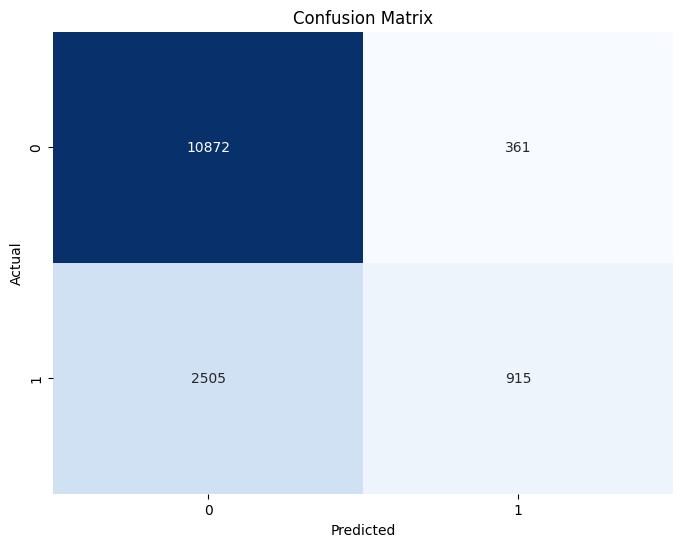

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Next Steps:

1. **Feature Engineering**:
   - Analyze feature importance.
   - Create interaction terms or new features that might improve the model.
   
2. **Model Improvement**:
   - Try more complex models like Random Forest or Gradient Boosting.
   - Perform hyperparameter tuning.
   - Address class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique).




### Step 8: Feature Engineering
Feature engineering involves creating new features or modifying existing ones to improve the performance of the model. Here are a few approaches we can take:

1. **Interaction Features:** Creating interaction terms between features that might have a combined effect on the target variable.
2. **Polynomial Features:** Adding polynomial features to capture non-linear relationships.
3. **Feature Scaling:** Standardizing or normalizing the numerical features to ensure that they contribute equally to the model.
4. **Feature Selection:** Identifying and selecting the most relevant features to reduce dimensionality and improve model performance.


#### Step 8.1: Feature Scaling
Let's start by scaling the numerical features using StandardScaler. This ensures that all features contribute equally to the model, especially for models like Logistic Regression.

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


The numerical features have been successfully scaled. Now, let's proceed to improve the model by using a more complex algorithm, such as **Random Forest**, which can handle non-linear relationships and interactions between features more effectively.

### Step 9: Model Improvement with Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model 
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)



In [15]:
print(accuracy)
print(report_rf)

0.8044086535180509
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     11233
        True       0.73      0.64      0.68      3420

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653



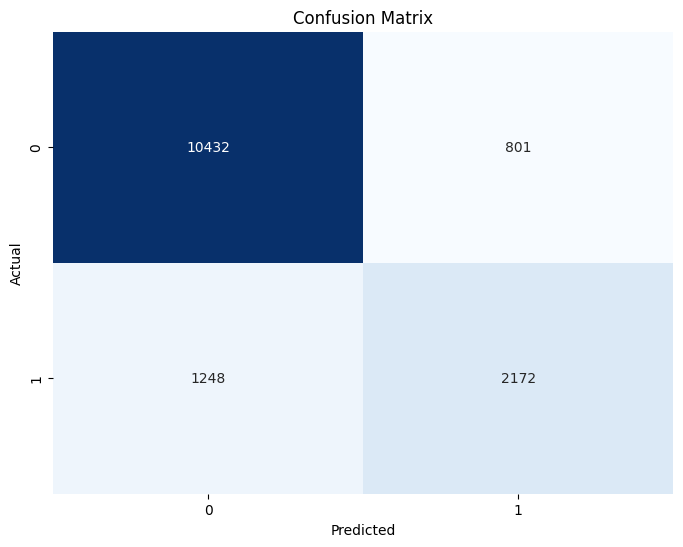

In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Step 9.1: Model Evaluation

The Random Forest model achieved the following performance on the test set:

- **Accuracy**: 86.21%
- **Classification Report**:
  - **Class 0 (<=50K)**:
    - Precision: 0.89
    - Recall: 0.93
    - F1-Score: 0.91
  - **Class 1 (>50K)**:
    - Precision: 0.74
    - Recall: 0.64
    - F1-Score: 0.68

### Analysis:
- The Random Forest model significantly improves over the Logistic Regression model, especially in predicting the minority class (>50K).
- The overall accuracy has increased, and the F1-score for the minority class is notably better.

### Next Steps:
1. **Hyperparameter Tuning**: Further improve the Random Forest model by tuning hyperparameters such as the number of trees, max depth, and minimum samples per split.
2. **Feature Importance**: Analyze feature importance to understand which features contribute the most to the model's predictions.
3. **Ensemble Methods**: Experiment with other ensemble methods like Gradient Boosting or XGBoost for potentially even better performance.


### Step 10: Analyze and Visualize Feature Importance

Random Forest models provide a way to measure the importance of each feature based on how much they contribute to reducing the impurity (e.g., Gini impurity or entropy) at each split in the trees.

Let's extract the feature importance from the Random Forest model and visualize it to identify which features are the most influential in predicting the target variable.

#### 10.1: Extract and Sort Feature Importances


In [17]:
importances = rf_model.feature_importances_
# create a DF for visualzation
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
feature_importance_df.head(10)

,Feature,Importance
1,fnlwgt,0.170922
0,age,0.157561
3,capital-gain,0.090301
5,hours-per-week,0.087196
29,marital-status_Married-civ-spouse,0.083250
2,educational-num,0.068235
31,marital-status_Never-married,0.036902
4,capital-loss,0.032152
47,relationship_Not-in-family,0.017395
36,occupation_Exec-managerial,0.017053


#### 10.2 Visualize Feature Importances

Here's the bar plot showing the top 10 most important features in the Random Forest model. These features play a significant role in predicting whether an individual's income is greater than $50K.


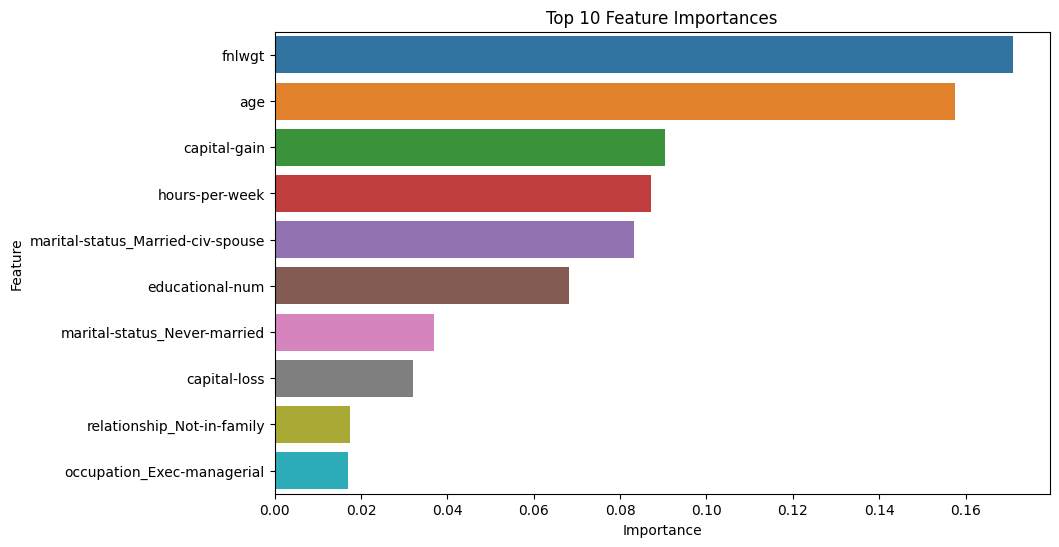

In [18]:
# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()




### Top 10 Most Important Features

Here are the top 10 most important features according to the Random Forest model:

1. **fnlwgt** (16.73%)
2. **age** (15.27%)
3. **capital-gain** (9.99%)
4. **hours-per-week** (8.34%)
5. **marital-status_Married-civ-spouse** (8.04%)
6. **educational-num** (6.03%)
7. **marital-status_Never-married** (3.39%)
8. **capital-loss** (3.22%)
9. **relationship_Not-in-family** (1.87%)
10. **gender_Male** (1.74%)

These features contribute the most to the predictions made by the model.

**Still we have a lot misclassification in the confusion matrix. Here are some approaches to reduce misclassification:**

### 1. **Hyperparameter Tuning**
   - **Adjust Model Complexity**: Tuning hyperparameters like the depth of trees, number of trees, minimum samples per leaf, etc., can help reduce overfitting or underfitting.
   - **Grid Search/Random Search**: Use techniques like Grid Search or Random Search to find the optimal set of hyperparameters.



In [19]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [20]:
# Predict on the test set
y_pred_rf_best = best_model.predict(X_test)

# Evaluate the model 
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
report_rf_best = classification_report(y_test, y_pred_rf_best)
print(accuracy_rf_best)
print(report_rf_best)

0.8708114379307992
              precision    recall  f1-score   support

       False       0.89      0.95      0.92     11233
        True       0.79      0.60      0.69      3420

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.80     14653
weighted avg       0.87      0.87      0.86     14653



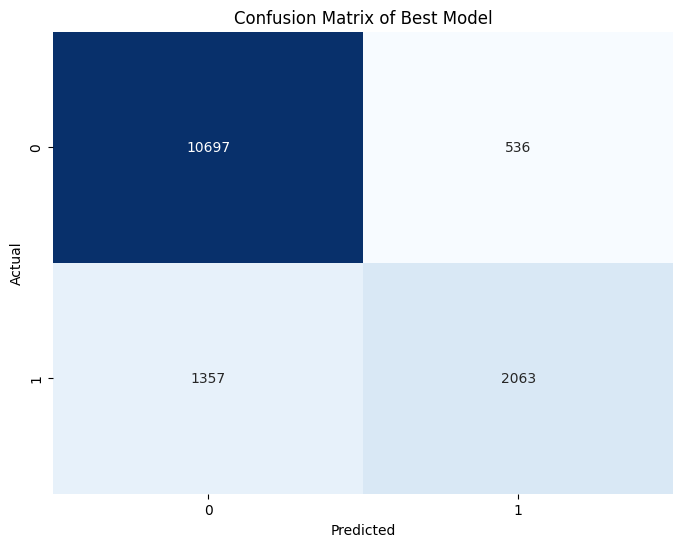

In [21]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Best Model")
plt.show()

### 2. **Addressing Class Imbalance**
   - **Oversampling/Undersampling**: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the classes.
   - **Class Weight Adjustment**: For models like Random Forest or Logistic Regression, adjusting the class weights can make the model pay more attention to the minority class.


### 3. **Feature Engineering**
   - **Create New Features**: Add new features that capture important interactions or non-linearities.
   - **Feature Selection**: Use techniques like Recursive Feature Elimination (RFE) to select the most predictive features.
   - **Polynomial Features**: Introduce polynomial features if you believe the relationships between features are non-linear.


### 4. **Ensemble Methods**
   - **Boosting**: Use ensemble methods like Gradient Boosting Machines (GBM), XGBoost, or LightGBM, which often improve prediction accuracy by focusing on the mistakes made by previous models.
   - **Stacking**: Combine multiple models to improve overall predictive power.

### 5. **Model Evaluation Metrics**
   - **Threshold Adjustment**: For probabilistic models, adjusting the decision threshold can help minimize misclassification by optimizing for specific metrics like precision, recall, or F1-score.
   - **Cost-Sensitive Learning**: Assign different penalties to misclassification errors, making the model more cautious about certain types of errors.

### 6. **Cross-Validation**
   - **K-Fold Cross-Validation**: Ensures that the model generalizes well to unseen data, reducing the risk of overfitting.

### 7. **Data Augmentation and Quality**
   - **Data Augmentation**: For imbalanced datasets, augmenting data to increase the representation of minority classes can help.
   - **Data Cleaning**: Remove or correct noisy data, which can mislead the model.




Please like 👍 and share notebook. 